# QFD (품질기능전개)

Q 고객들이 무엇을 원하는가?

Q 그것을 구현하기 위해 어떤 기능을 구현해야 하는가?

A 고객의 니즈를 정확히 파악 후, 이를 만족시키기 위해 초기(디자인/개발) 단계에서부터 각 프로세스별로 주요 관리 인자(Function)를 도출

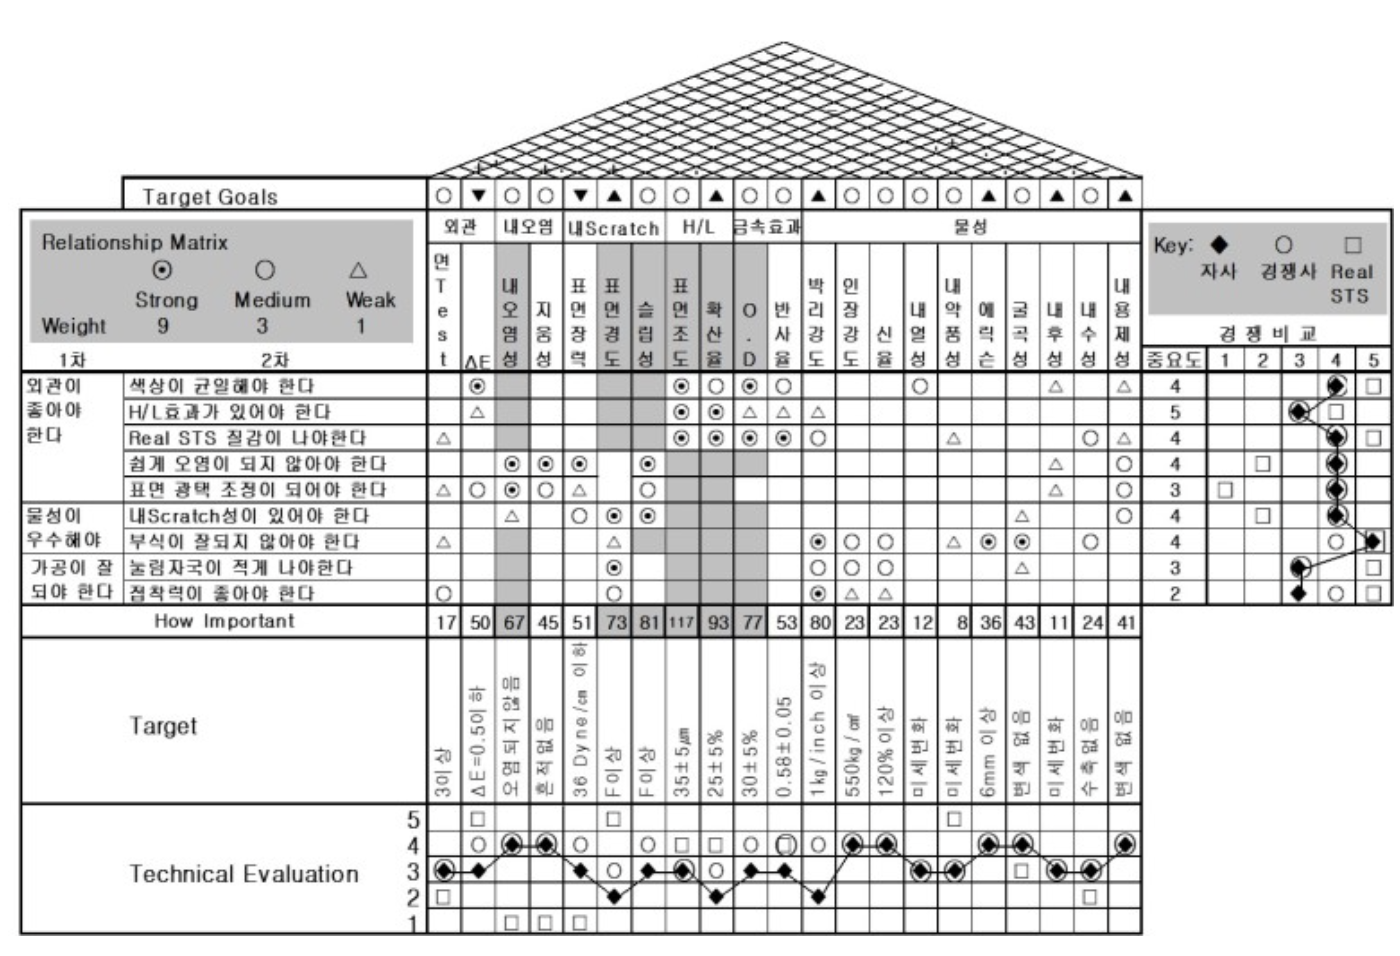

[1]
1. Prepare "What" list (customer requirement list)
2. Prioritize customer requirement list (ex. AHP)
3. Translate Requirements to quantifiable measures (ex. AHP)

[2],[3]
4. Determine "How" measurement

[4]
5. Prepare correlation matrix
6. Determine "What" and "How" relationship

[5] (Calculate value inside HOQ)
7. Determine design characteristics importance
8. Evaluate current competitors
9. Identify benchmarks
10. Determine target values

[6]
11. New design evaluation

***`요약`***

우선 What list 와 How list 구성 후,

What list 간의 중요도를 산정하기 위해 AHP를 사용하며,

이후 앞서 구성한 What list 와 How list 를 바탕으로 HOQ를 구성하여 QFD 분석 시행

(이 과정은 직렬 / 병렬로 반복될 수 있다)

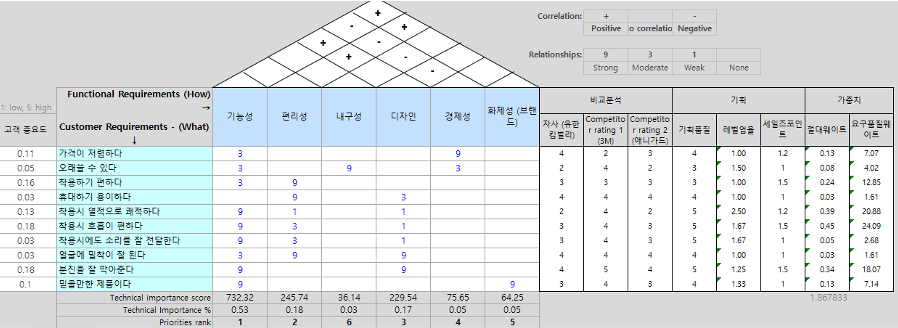

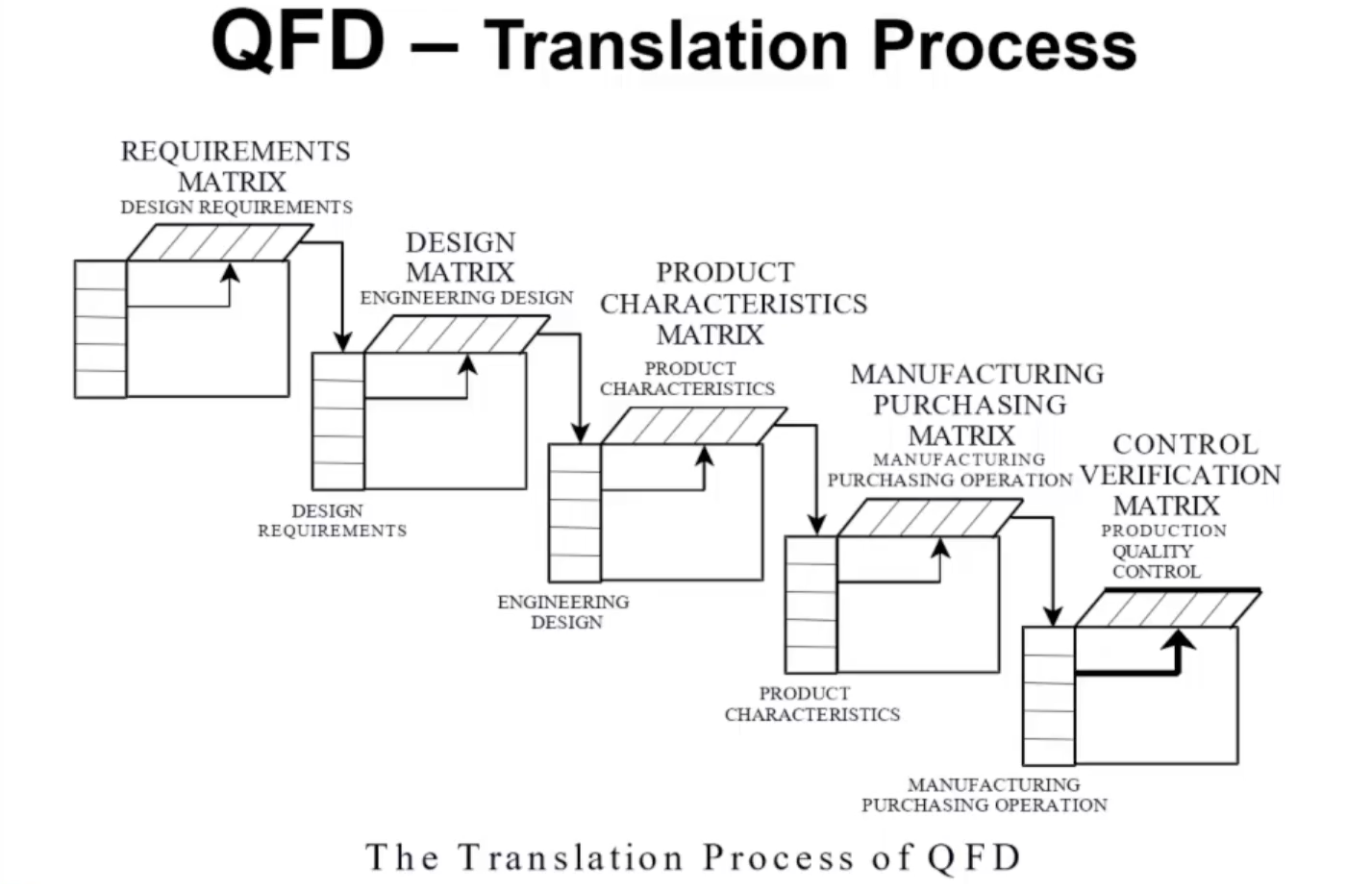

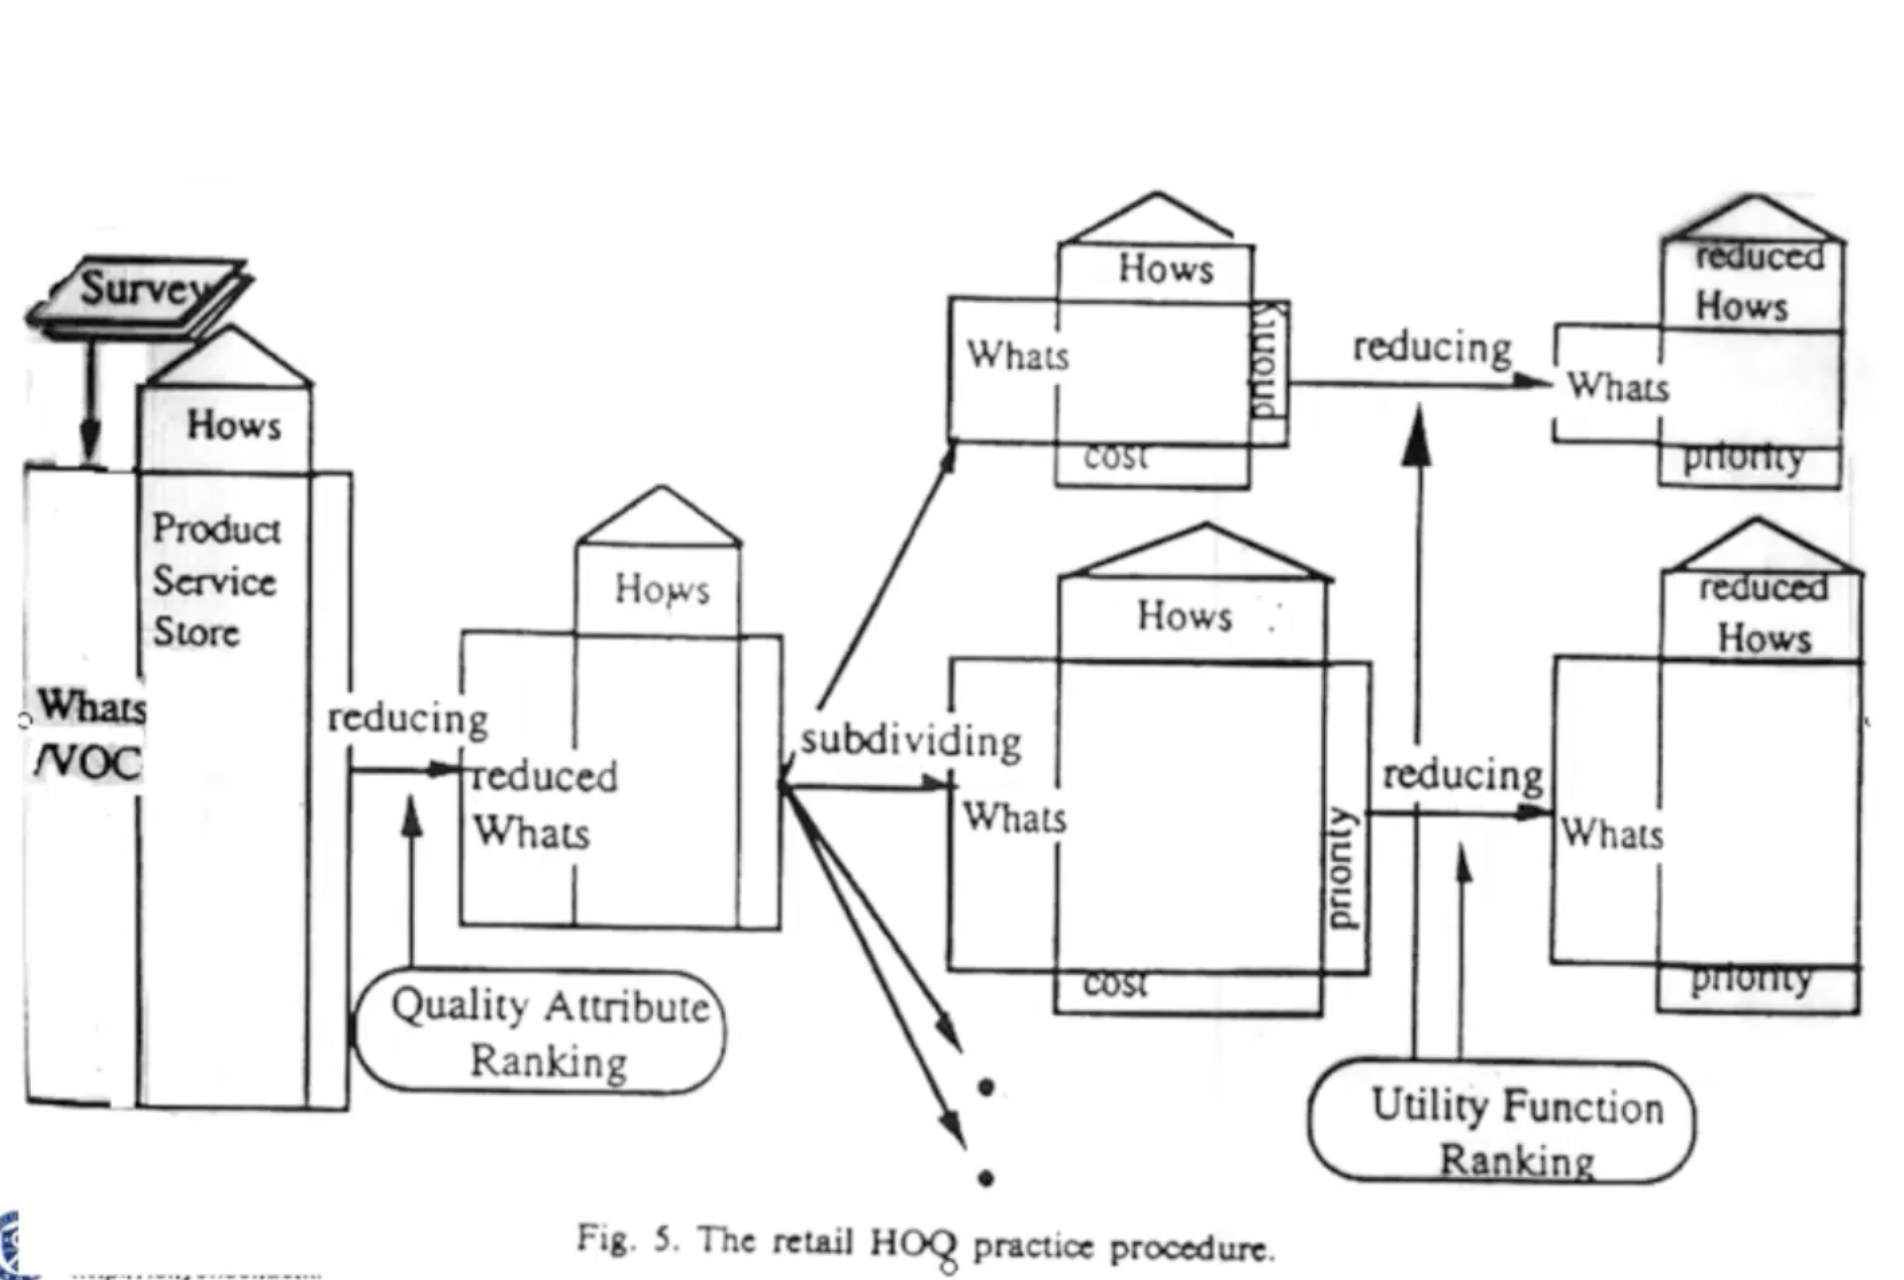

In [ ]:
import numpy as np
import pandas as pd

# [1] What List

What List = 고객이 무엇을 원하는지를 설문조사 / 인터뷰 / 시장 조사 등을 통해 파악

= 문제 정의와 목표를 설정해 계층 구조 설계

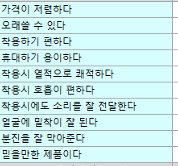

## AHP

- 쌍대 비교 (Pairwise Comparison)
- 의사결정의 목표 또는 평가기준이 다수이며 복합적인 경우, 이를 계층(Hierarchy)화해, 주요 요인과 그 주요 요인을 이루는 세부 요인들로 분해하고, 이러한 요인들을 쌍대 비교(Pairwise Comparison)를 통해 중요도를 산출하는 분석 방법
- AHP는 평가 기준이 다수이고 상호 배타적인 대안들의 중요도 및 우선순위를 체계적으로 판단하기 위한 기법

- HOQ를 작성하기에 앞서, 앞에서 도출해 낸 각 **What List의 중요도를 산정**하기 위해 AHP 분석 기법을 이용
- 주로 직접 설문조사 등을 통해 설문조사의 응답비율을 참고하여 쌍대 비교표(비교행렬) 작성

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sinsekai&logNo=70096399765



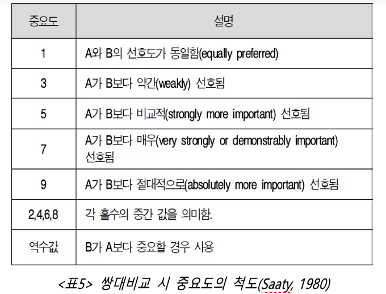

비교 행렬 =

i) 모든 조합에 대한 설문조사 (Full Profile Method)

ii) 특정 조합에 대한 설문조사 (Fractional Factorial Design 또는 Partial Profile Method)

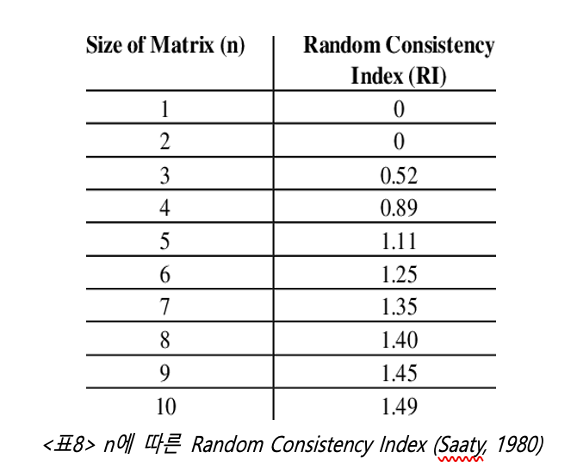

### Ex1)

Job 1,2,3  
Objects
1. O1: High salary
2. O2: Quality of Life
3. O3: Interest of Work
4. O4: Job Location

#### 상대값 데이터

In [ ]:
ahp=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2. 품질공학/AHP_data.xlsx')
ahp=ahp.set_index('Unnamed: 0')

In [ ]:
ahp

연봉  워라밸   흥미   위치
Unnamed: 0                     
연봉          1.00    5  2.0  4.0
워라밸         0.20    1  0.5  0.5
흥미          0.50    2  1.0  2.0
위치          0.25    2  0.5  1.0

#### Weight of each objectives

In [ ]:
Anorm=pd.DataFrame()
for i in range(4):
  Anorm[i]=ahp.iloc[:,i]/sum(ahp.iloc[:,i])
Anorm.columns=ahp.columns

In [ ]:
Anorm

연봉  워라밸     흥미        위치
Unnamed: 0                                
연봉          0.512821  0.5  0.500  0.533333
워라밸         0.102564  0.1  0.125  0.066667
흥미          0.256410  0.2  0.250  0.266667
위치          0.128205  0.2  0.125  0.133333

In [ ]:
weights=[np.round(sum(Anorm.iloc[i,:])/4,4) for i in range(4) ]
weights

[0.5115, 0.0986, 0.2433, 0.1466]

### Ex2)

Salary 1,2,3

#### 상대값 데이터

In [ ]:
salary=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2. 품질공학/AHP_data.xlsx',sheet_name='Salary')
salary=salary.set_index('Unnamed: 0')

In [ ]:
salary

네이버  카카오   삼성
Unnamed: 0               
네이버           1    1  0.5
카카오           1    1  0.5
삼성            2    2  1.0

#### Weight of each jobs

In [ ]:
Sal=pd.DataFrame()
for i in range(3):
  Sal[i]=salary.iloc[:,i]/sum(salary.iloc[:,i])
Sal.columns=salary.columns

In [ ]:
sal_weights=[np.round(sum(Sal.iloc[i,:])/3,4) for i in range(3) ]
sal_weights

[0.25, 0.25, 0.5]

# [2],[3] Determine "How" measurement

How List = 기존 문헌 / 전문가 인터뷰 / 시장 조사 등을 통해 파악

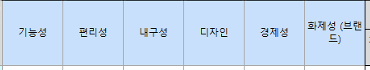

# [4] Determine "What" and "How" relationship

Relationship inside matrix = 기존 문헌 / 전문가 인터뷰 / 시장 조사 등을 통해 파악

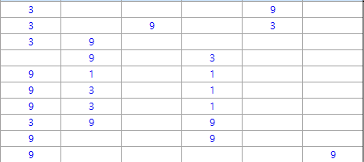

# [5] Calculate values inside HOQ



비교 분석 + 기획품질 + 세일즈 포인트 = 연구자

레벨업률 + 절대웨이트 + 요구품질웨이트 = 함수

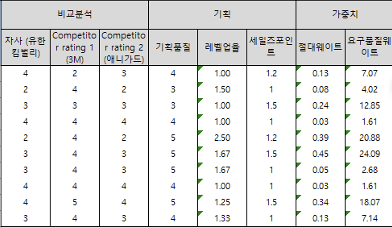

### What list, How list, 상관관계 데이터




In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2. 품질공학/QFD_data.xlsx')
data=data.fillna(0)
data=data.set_index('Unnamed: 0')

In [ ]:
data

Shape Factor  Weight  Durability  Ignition  \
Unnamed: 0                                                                
Certainly ignite                        0       0           3         5   
Convenient for using                    5       5           0         0   
Safe to Carry                           3       1           5         3   
Can be used for a long time             0       0           5         3   
Good design                             3       3           0         0   
Feel attached                           0       0           1         0   

                             Operation  Design  Popular  Importance  \
Unnamed: 0                                                            
Certainly ignite                     3       0        0           5   
Convenient for using                 0       0        0           5   
Safe to Carry                        0       0        0           4   
Can be used for a long time          3       1        0           3   
Good design                          0       5        3           4   
Feel attached                        1       3        5           3   

                             Our Product  Company X  Company Y  Company Z  \
Unnamed: 0                                                                  
Certainly ignite                       4          5          3          4   
Convenient for using                   3          4          3          3   
Safe to Carry                          4          4          4          4   
Can be used for a long time            3          3          3          3   
Good design                            3          4          2          3   
Feel attached                          3          4          3          4   

                             Target level  Level Ratio  sales point  
Unnamed: 0                                                           
Certainly ignite                        5          0.0          1.0  
Convenient for using                    5          0.0          1.5  
Safe to Carry                           4          0.0          1.0  
Can be used for a long time             3          0.0          1.0  
Good design                             4          0.0          1.2  
Feel attached                           4          0.0          1.0

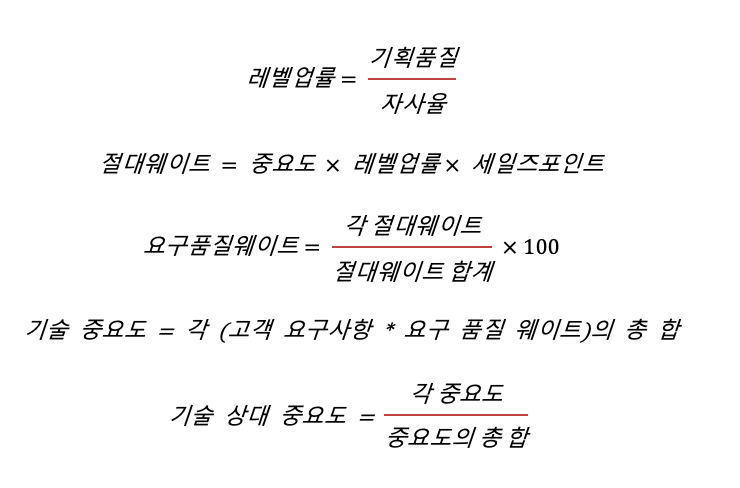

### Level Ratio
기획품질/자사품질

In [ ]:
data['Level Ratio']=np.round(data['Target level']/data['Our Product'],2)

In [ ]:
data

Shape Factor  Weight  Durability  Ignition  \
Unnamed: 0                                                                
Certainly ignite                        0       0           3         5   
Convenient for using                    5       5           0         0   
Safe to Carry                           3       1           5         3   
Can be used for a long time             0       0           5         3   
Good design                             3       3           0         0   
Feel attached                           0       0           1         0   

                             Operation  Design  Popular  Importance  \
Unnamed: 0                                                            
Certainly ignite                     3       0        0           5   
Convenient for using                 0       0        0           5   
Safe to Carry                        0       0        0           4   
Can be used for a long time          3       1        0           3   
Good design                          0       5        3           4   
Feel attached                        1       3        5           3   

                             Our Product  Company X  Company Y  Company Z  \
Unnamed: 0                                                                  
Certainly ignite                       4          5          3          4   
Convenient for using                   3          4          3          3   
Safe to Carry                          4          4          4          4   
Can be used for a long time            3          3          3          3   
Good design                            3          4          2          3   
Feel attached                          3          4          3          4   

                             Target level  Level Ratio  sales point  
Unnamed: 0                                                           
Certainly ignite                        5         1.25          1.0  
Convenient for using                    5         1.67          1.5  
Safe to Carry                           4         1.00          1.0  
Can be used for a long time             3         1.00          1.0  
Good design                             4         1.33          1.2  
Feel attached                           4         1.33          1.0

### Weights
1.Absolute Weight: 중요도* 레벨업률 * 세일즈포인트  
2.Required Quality Weight = 각 what list의 absolute weight / 전체 absolute weight

In [ ]:
data['Absolute Weight']=np.round(data['Importance']*data['Level Ratio']*data['sales point'],3)

In [ ]:
weight_sum=np.round(sum(data['Absolute Weight']),2)

In [ ]:
data['Required Quality Weight']=np.round(data['Absolute Weight']*100/weight_sum,2)

In [ ]:
data['Required Quality Weight']

Unnamed: 0
Certainly ignite               17.29
Convenient for using           34.65
Safe to Carry                  11.07
Can be used for a long time     8.30
Good design                    17.66
Feel attached                  11.04
Name: Required Quality Weight, dtype: float64

### Importance of How list


In [ ]:
importance_of_howlist=[]
for i in range(7):
  what=data.iloc[:,i]
  importance=data.loc[:,'Required Quality Weight']
  importance_of_howlist.append(sum(what*importance))

In [ ]:
importance_of_howlist

[259.44, 237.3, 159.76, 144.56, 87.81, 129.72, 108.18]

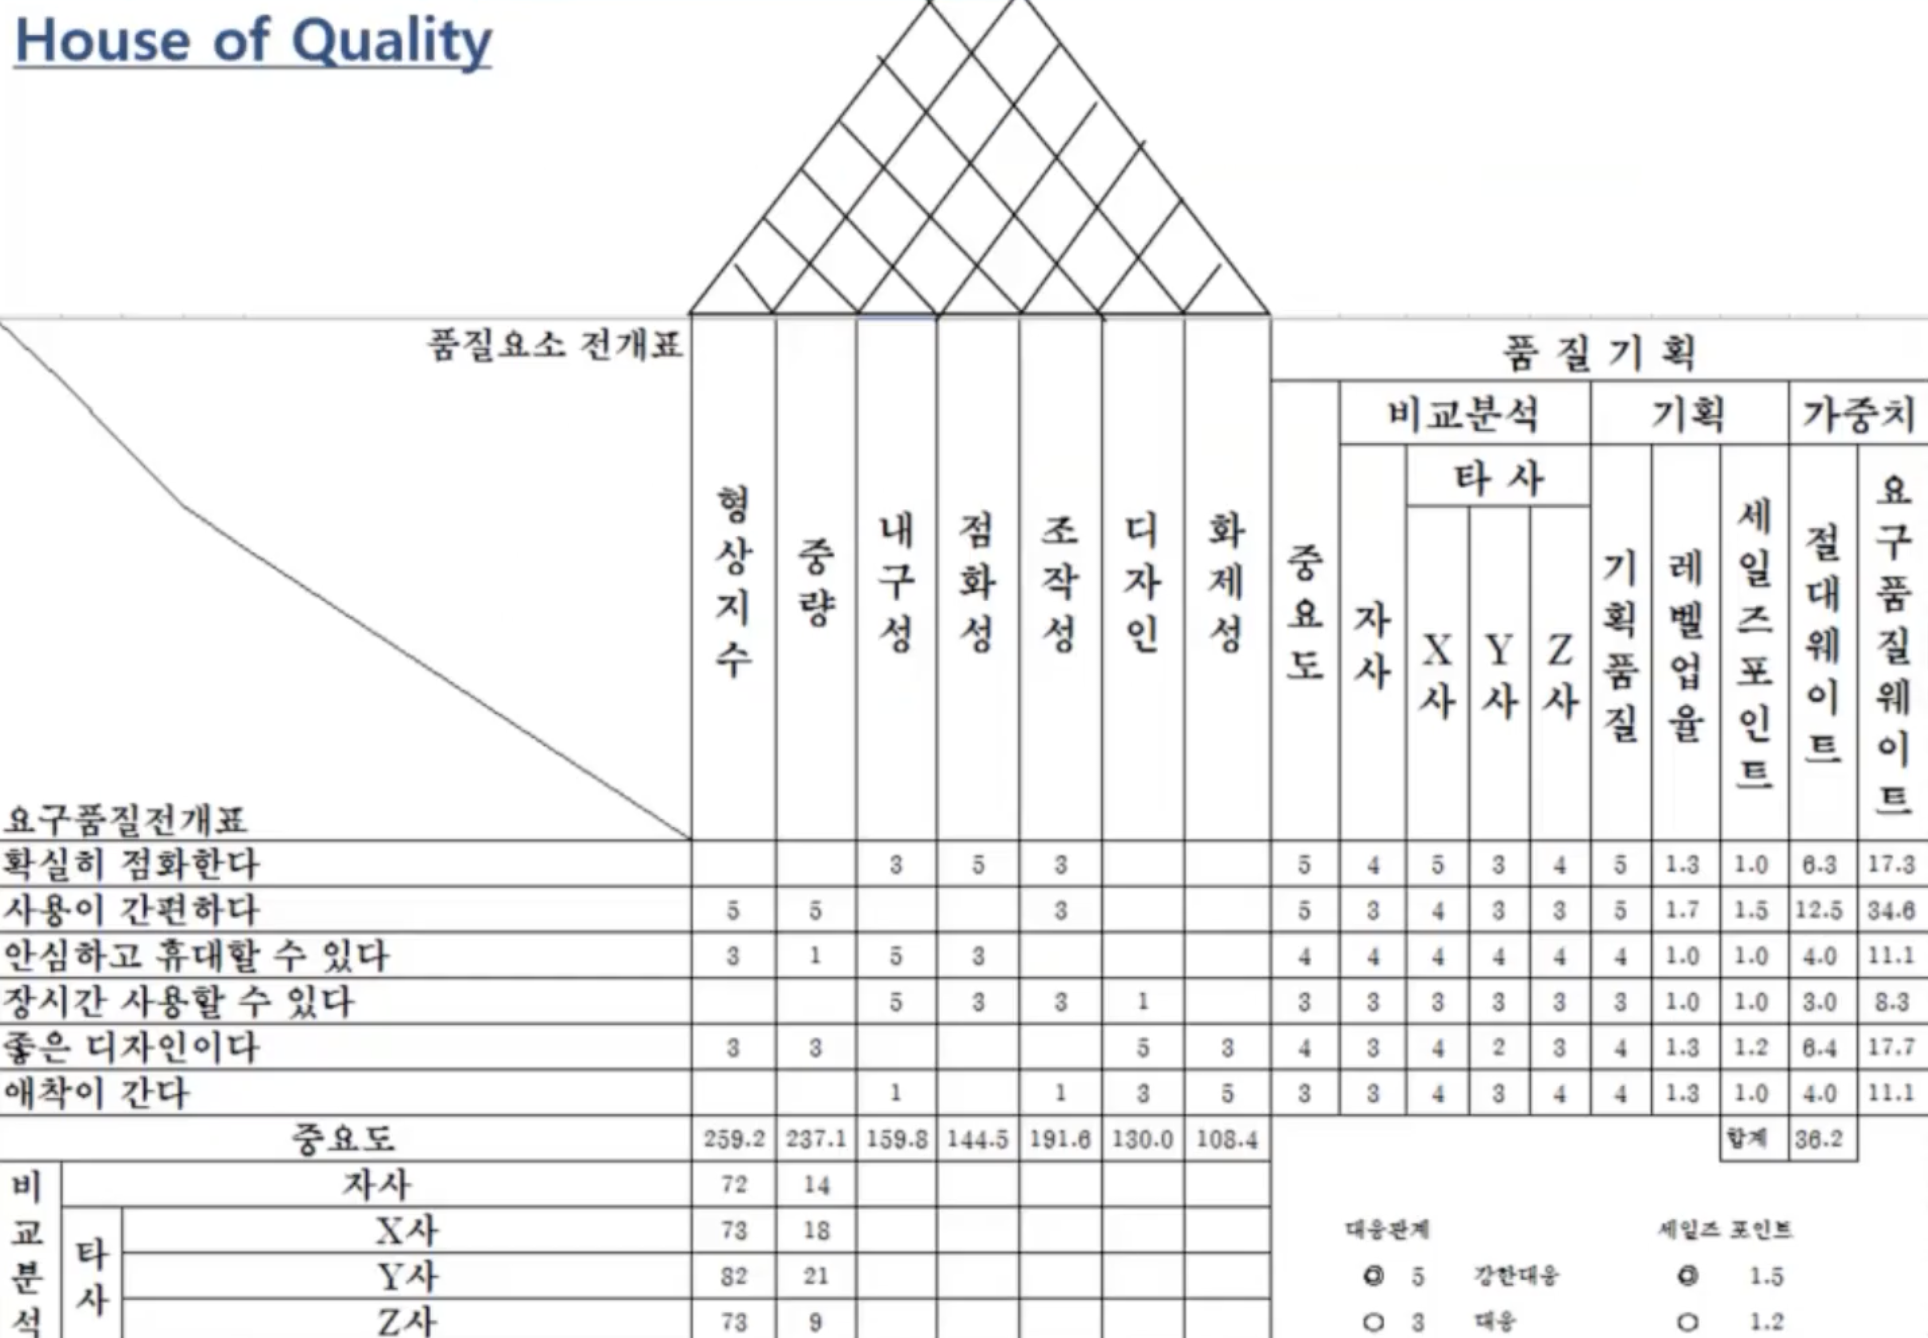

# [6] New design evaluation

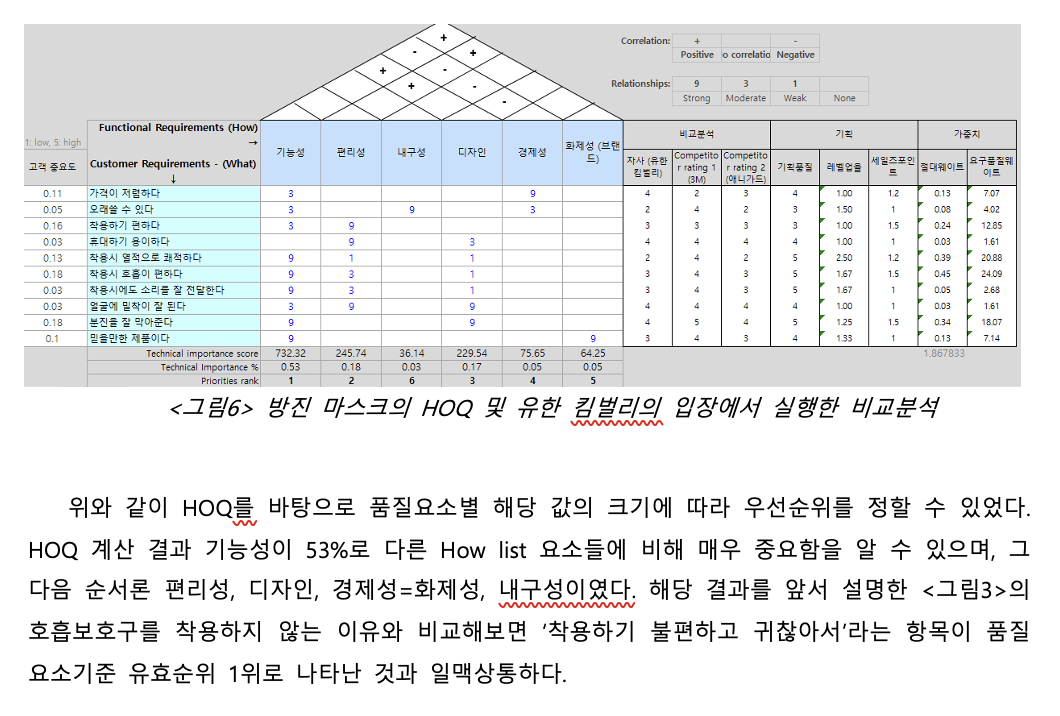